# Linear Regression
In this module we are going to perform linear regression on a couple of datasets. Because my whole Github repository is centered around the analysis of wine, I decided to analyze various attributes of wine and see if there were any linear correlations. Also, I wanted to see if any of there were any trends in data for determining the quality of a wine. This way, if I ever wanted to predict if a wine was high-quality in the future (without looking at the price tag), I could analyze these factors.

### Read data
First, we start by reading the data. The data I will be using for this module comes from the red wine quality and white wine quality data sets that are explained in more depth in the introduction to my Github repository. However, as a brief synopsis, these two data sets offer various attributes of red and white wine as well as there quality.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

red = pd.read_csv("winequality-red.csv")
white = pd.read_csv("winequality-white.csv")

### White Wine Pairplot
Now let's plot the pairplots of white wine to see if there seem to be any linear correlations between any of the attributes. By plotting quality as the hue, we can also see if there seem to be any trends in quality for the attributes. 

When I look at alcohol vs. density, there seems to be a pretty linear correlation. Also, higher density seems to correlate with higher quality, so let's analyze alcohol and density.

Note: While I am also doing some analysis of quality, this is in a much more inexact and pictorial manner. The purpose of this module is more to demonstrate linear regression than to do a deep dive into the factors that determine the quality of a wine.

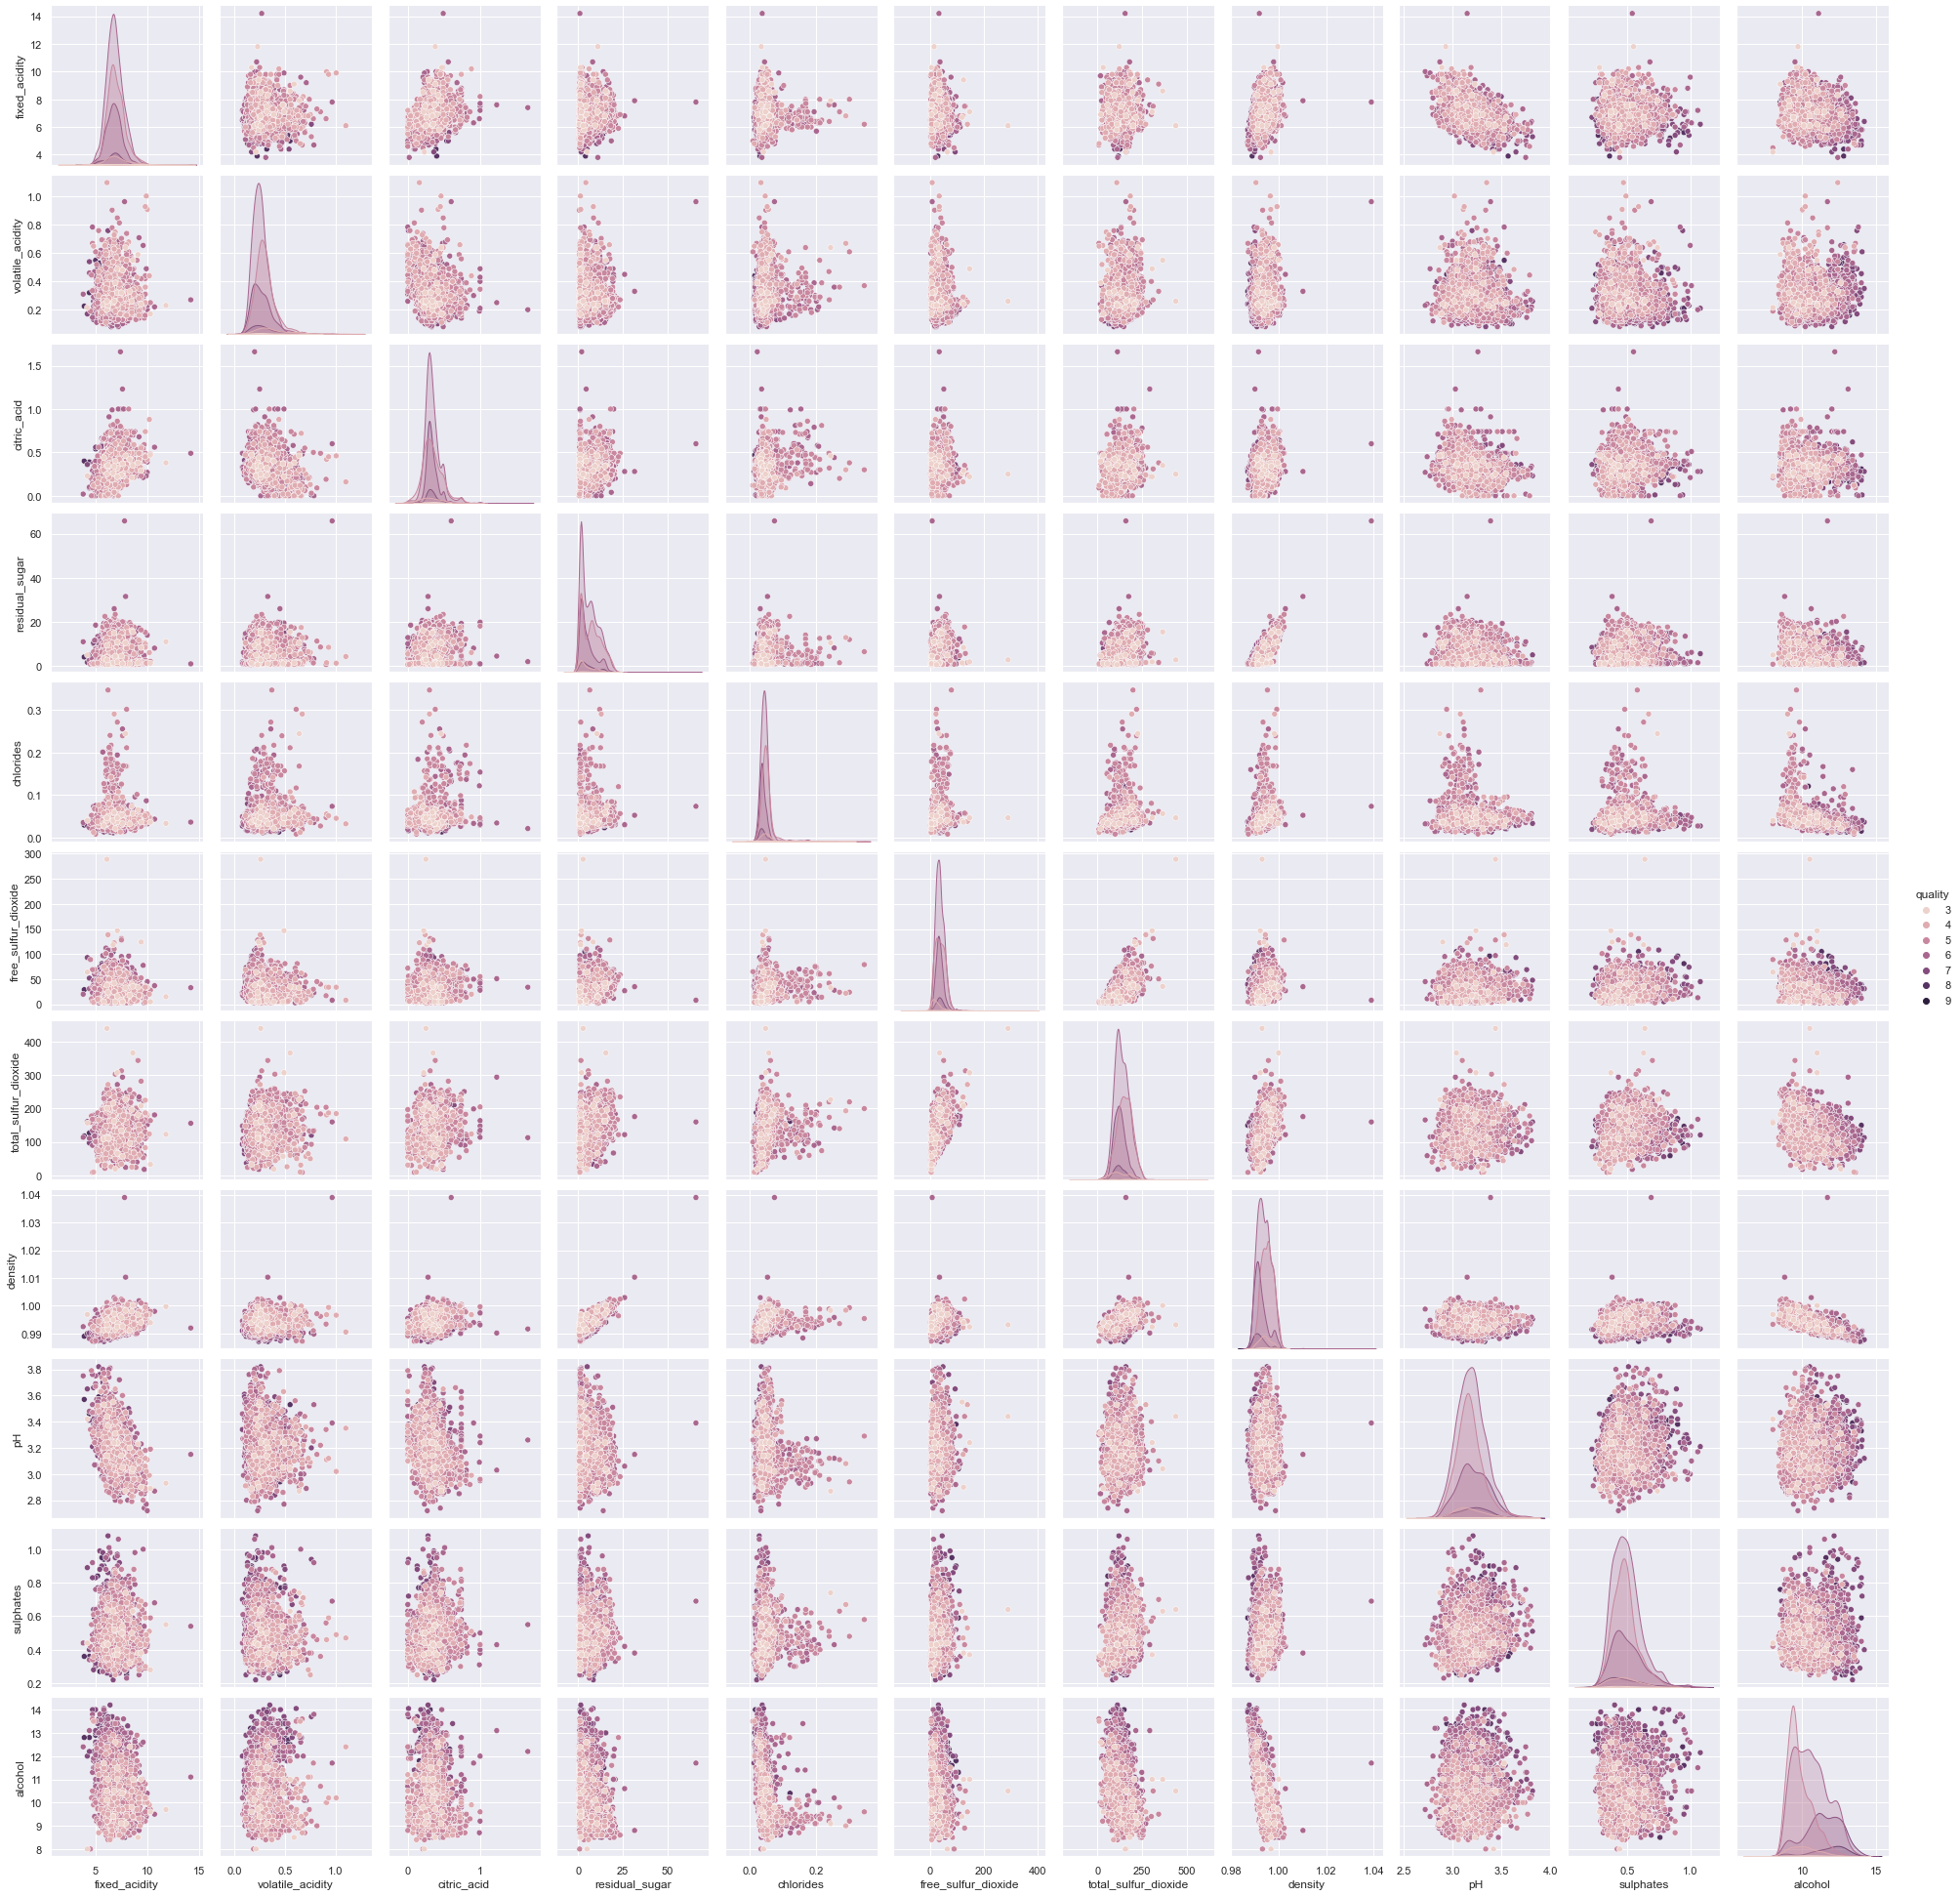

In [6]:
sns.pairplot(white, hue = "quality")

### Red Wine Pairplots
Now let's look at the pairplots for the red wine dataset. There seems to be much less linear correlation between alcohol and density, but using linear regression on these two attributes can also be a way to analyze what happens when we use linear regression on less-linear or even non-linear data.

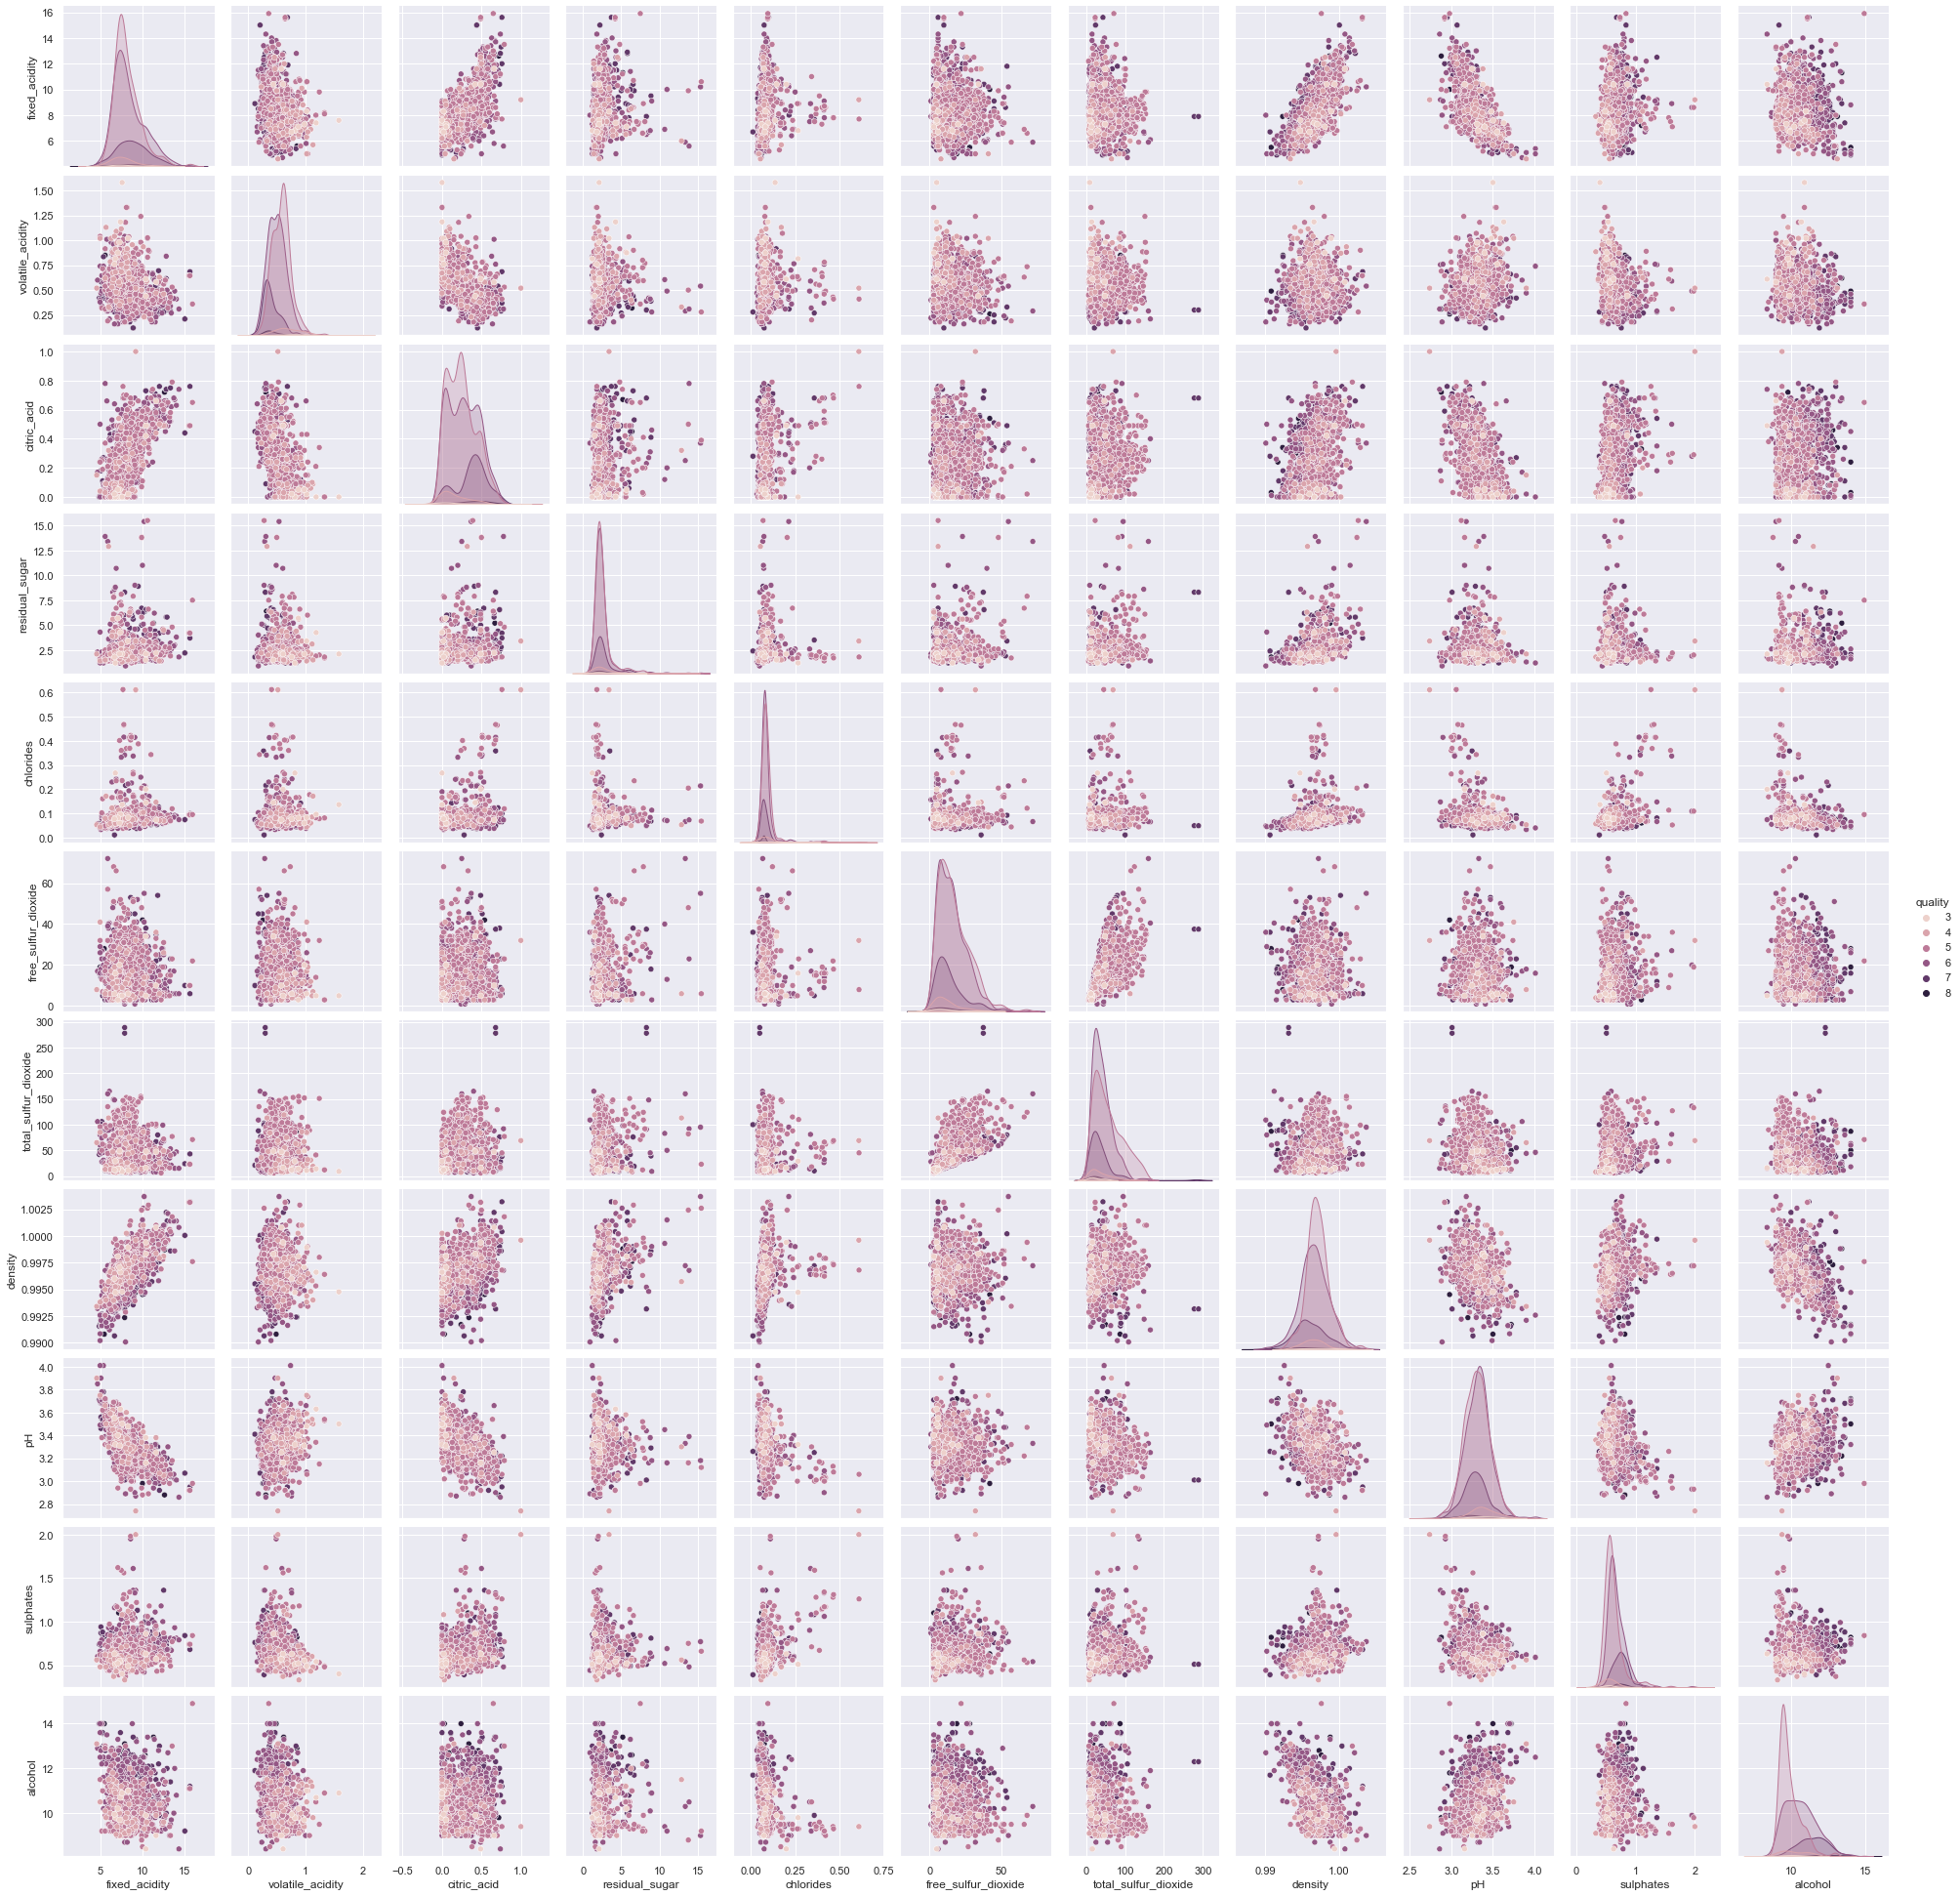

In [4]:
sns.pairplot(red, hue = "quality")

### Plot White Wine Data
The plot of alcohol vs. density on the pairplots was really small. Let's see what happens when we plot them on a bigger scale. Upon closer examination, the data for alcohol vs. density for white wine does seem to be pretty linear. Also, there indeed seems to be a slight correlation between quality of wine and alcohol content. However, there does seem to be a few major outliers to our data that we might have to be wary of when conducting linear regression. These outliers could slightly skew our data.

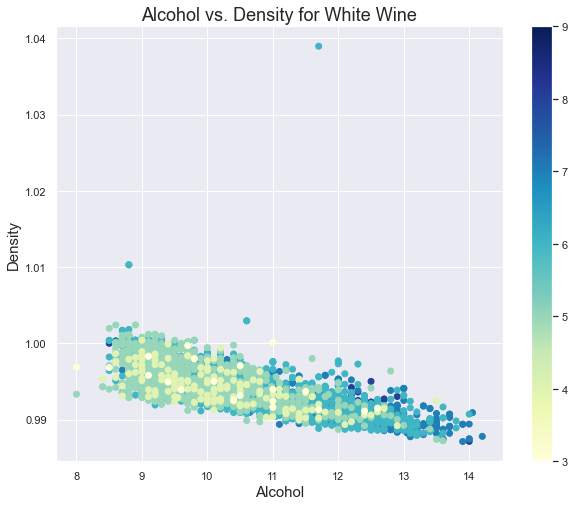

In [29]:
plt.figure(figsize = (10, 8))
plt.scatter(white.alcohol, 
            white.density, 
            c = white.quality,
            cmap = "YlGnBu")
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
#plt.legend(fontsize = 15)
plt.title("Alcohol vs. Density for White Wine", fontsize = 18)
plt.colorbar()
plt.show()

### Plot Red Wine Data
Let's also plot alcohol vs. density for the red wine dataset. As we can see, there is less of a linear correlation between alcohol and density. However, the correlation seems to be there still. Furthermore, there seems to be the same correlation between high quality and high alcohol content.

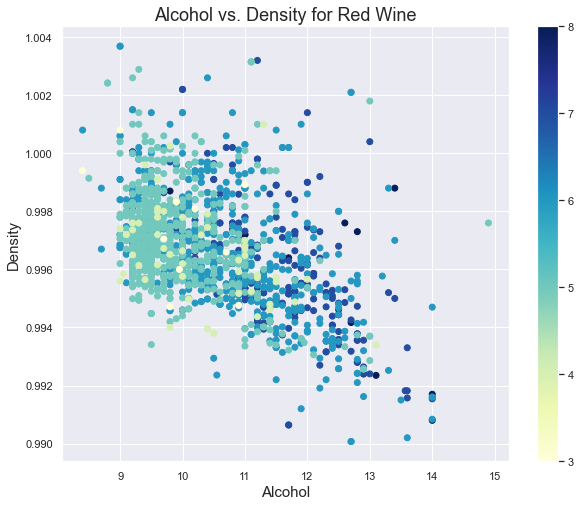

In [25]:
plt.figure(figsize = (10, 8))
plt.scatter(red.alcohol, 
            red.density, 
            c = red.quality,
            cmap = "YlGnBu")
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.colorbar()
plt.title("Alcohol vs. Density for Red Wine", fontsize = 18)
plt.show()

### Create Linear Regression Model
Now let's actually create a model that runs linear regression. We set the preactivation function of the form "mx+b", or linear form. There are multiple ways to analyze error, but we will use mean-squared error: 
$$
C(\mathbf{w}, b) = \frac{1}{2N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

to calculate our error. Finally, we will implement Stochastic gradient descent to minimize our error and find the best regression line. To learn more about Stochastic vs. Batch gradient descent, you can reference the README file for this module.

In [130]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean squared error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            if errors/N < 0.000001:
                return self
            else:
                self.errors_.append(errors/N)
            #self.errors_.append(errors/N)
        #return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)




### Quick Data Formatting
For single entry feature vectors, we need to reshape our vectors using the ```reshape(-1, 1)``` method in order to shape the right dimensions needed for vector and matrix multiplication.

We will also set X1, y1 to be the corresponding values for the alcohol and density of white wine, while X2, y2 are the corresponding values for the alcohol and density of red wine.

In [116]:
X1 = white["alcohol"].values
X1 = X1.reshape(-1, 1)
y1 = white.density

X2 = red["alcohol"].values
X2 = X2.reshape(-1, 1)
y2 = red.density

### Linear Activation
The last thing we need to do before we run the code is set an activation function. Because the preactivation function is already of the form mx+b, we can just set the linear activation function to spit out the same thing.

In [117]:
def linear_activation(z):
    return z

### Run Linear Regression on White Wine Dataset
Now comes the fun part! Let us actually run our model on the white wine data set. On the left is the plot of our original data as well as the linear regression line, while on the left is our error chart. As we can see, we did pretty good! The line fits pretty well and our error is definitely decreasing. We can also see that it only took us four epochs to get to an error less than 10^-6. Overall pretty good!

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

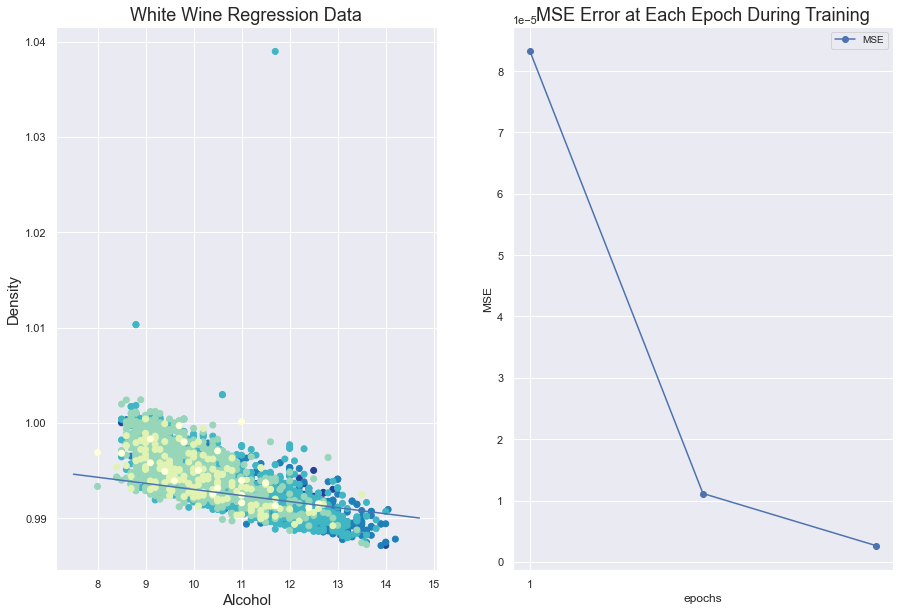

In [137]:
node = SingleNeuron(linear_activation)
node.train(X1, y1, alpha = .01, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
domain = np.linspace(np.min(X1) - .5, np.max(X1) + .5, 100)

ax1.scatter(X1, y1, c = white.quality, cmap = "YlGnBu")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Alcohol", fontsize = 15)
ax1.set_ylabel("Density", fontsize = 15)
ax1.set_title("White Wine Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)


### Red Wine Dataset
Now let's try to run our linear regression model for the red wine dataset. As we can see, the results are a little stranger. The line doesn't seem to fit the data very well, and it takes a lot more epochs to get to the same error level. 

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

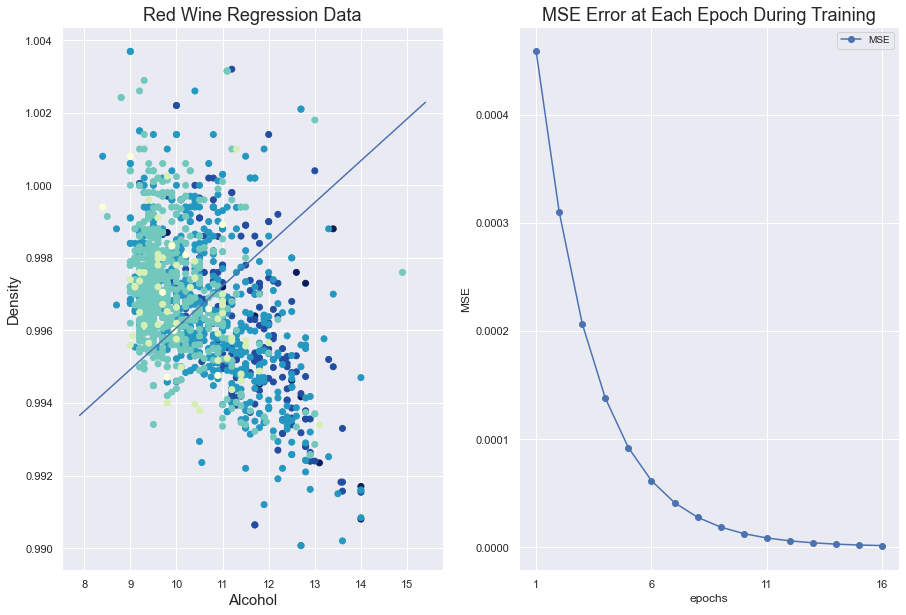

In [140]:
node = SingleNeuron(linear_activation)
node.train(X2, y2, alpha = .01, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
domain = np.linspace(np.min(X2) - .5, np.max(X2) + .5, 100)

ax1.scatter(X2, y2, c = red.quality, cmap = "YlGnBu")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Alcohol", fontsize = 15)
ax1.set_ylabel("Density", fontsize = 15)
ax1.set_title("Red Wine Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

## Takeaways
Through this module, we can gain a few main takeaways. The first takeaway is that there does seem to be a correlation between alcohol and density, especially in the white wine. Higher alcohol content in white wine seems to correlate to lower density. However, the opposite seems to be true for red wine. Higher alcohol content in red wine correlates to higher density. Of course, it should be noted that the linear correlation between alcohol and density for red wine seems to be a lot smaller than that of white wine, so the data could be potentially skewed and thus this result should be thrown out. 

This leads to our next takeaway. Another takeaway is the importance of using linear data for linear regression. If the data is not as linear and we try to glean insights from linear regression, we are just misinterpreting data. Thus, in reality, while we can say pretty well that for white wine, higher alcohol content means lower density, we can't make similar conclusions regarding red wine. Just because we get a line of best fit, this doesn't mean that it necessarily holds significant value, like for the example of red wine.